# Perkenalan

- Nama: Muhamad Afif Thufail
- Batch : FTDS Batch 10
- Dataset : Telco Customer Churn


- Tujuan: Memprediksi customer akan meninggalkan produk/jasa suatu perusahaan (Churn) atau tidak.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


# Data Loading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat 20 kolom dan 7043 baris pada dataset tersebut. 1 kolom bertipe float, 2 kolom bertipe integer, dan 18 kolom bertipe object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values pada dataset tersebut.

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Kolom SeniorCitizen kemungkinan adalah kolom dengan tipe data boolean.

# Exploratory Data Analysis

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Terdapat 2 output yaitu No dan Yes, output-output tersebut perlu dilakukan perubahan menjadi No = 0 dan Yes = 1

churn rate adalah tingkat atau persentase pelanggan memutus hubungan dengan sebuah bisnis atau perusahaan pada quarter tertentu. 
Sumber: https://www.investopedia.com/terms/c/churnrate.asp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d1d835cd0>,
      dtype=object)

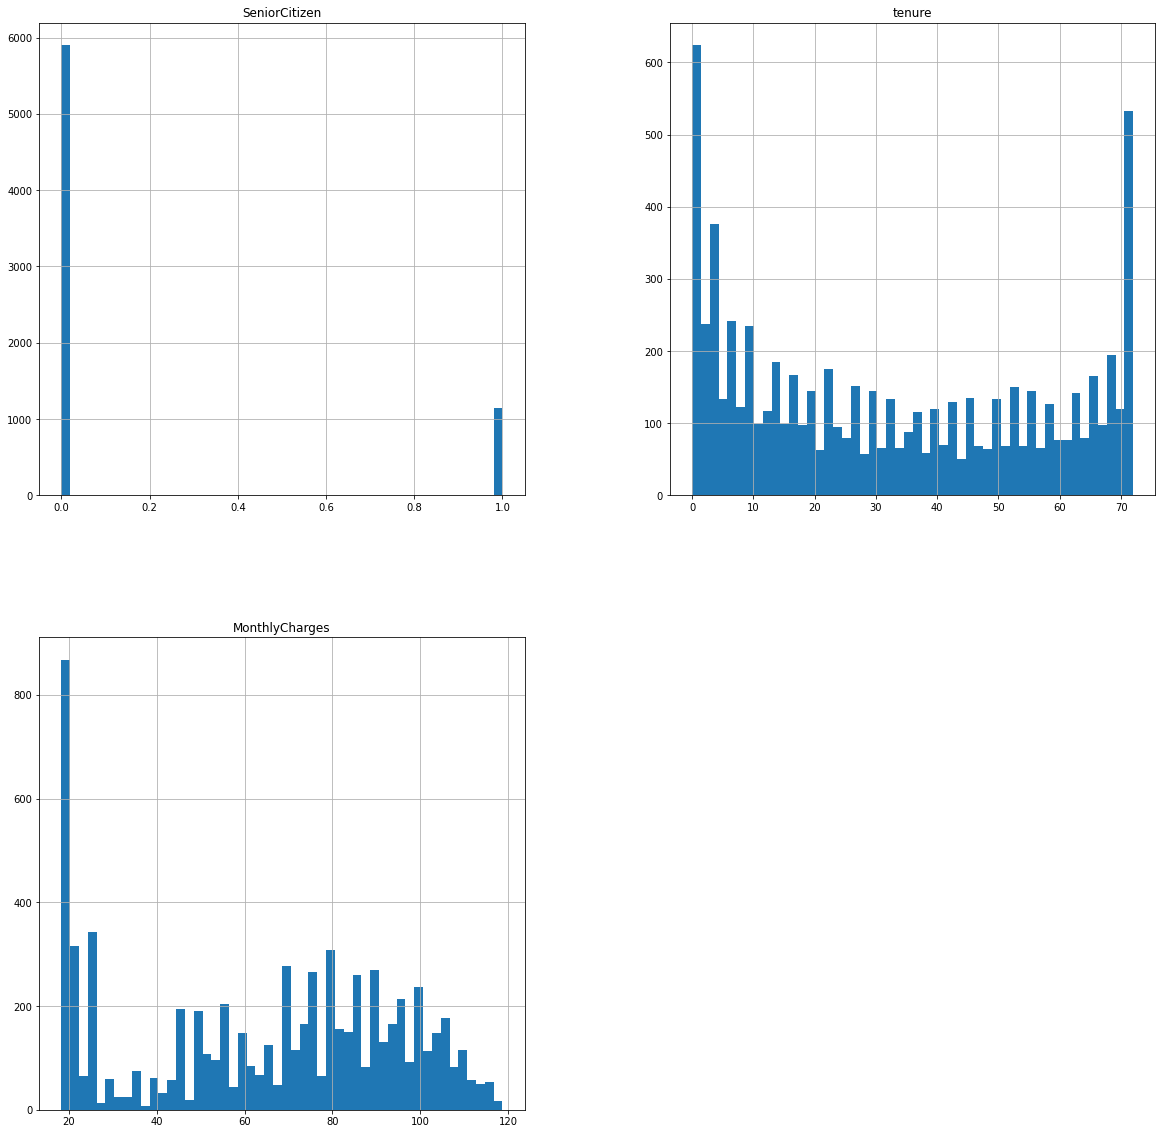

In [7]:
data.hist(figsize=(20,20), bins=50)

- Kolom SeniorCitizen merupakan kolom bertipe boolean dimana 0 kemungkinan adalah tidak dan 1 kemungkinan adalah iya

- Kebanyakan tenure berada pada nilai 0 dan 70

- Kebanyakan MonthlyCharges berada pada nilai 20

In [8]:
groupby_target = data.groupby('Churn').mean()
groupby_target

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


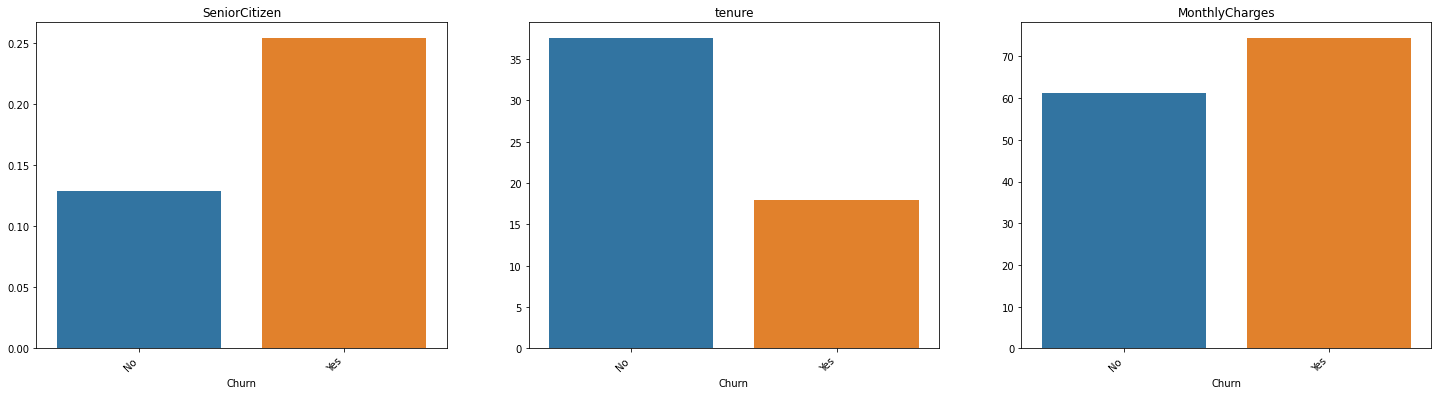

In [9]:
fig,axes=plt.subplots(1,3, figsize=(25,6))
axe= axes.ravel()
for i,col in enumerate(groupby_target.columns):
    sns.barplot(x=groupby_target[col].index, y=groupby_target[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

In [10]:
cat_data = data[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

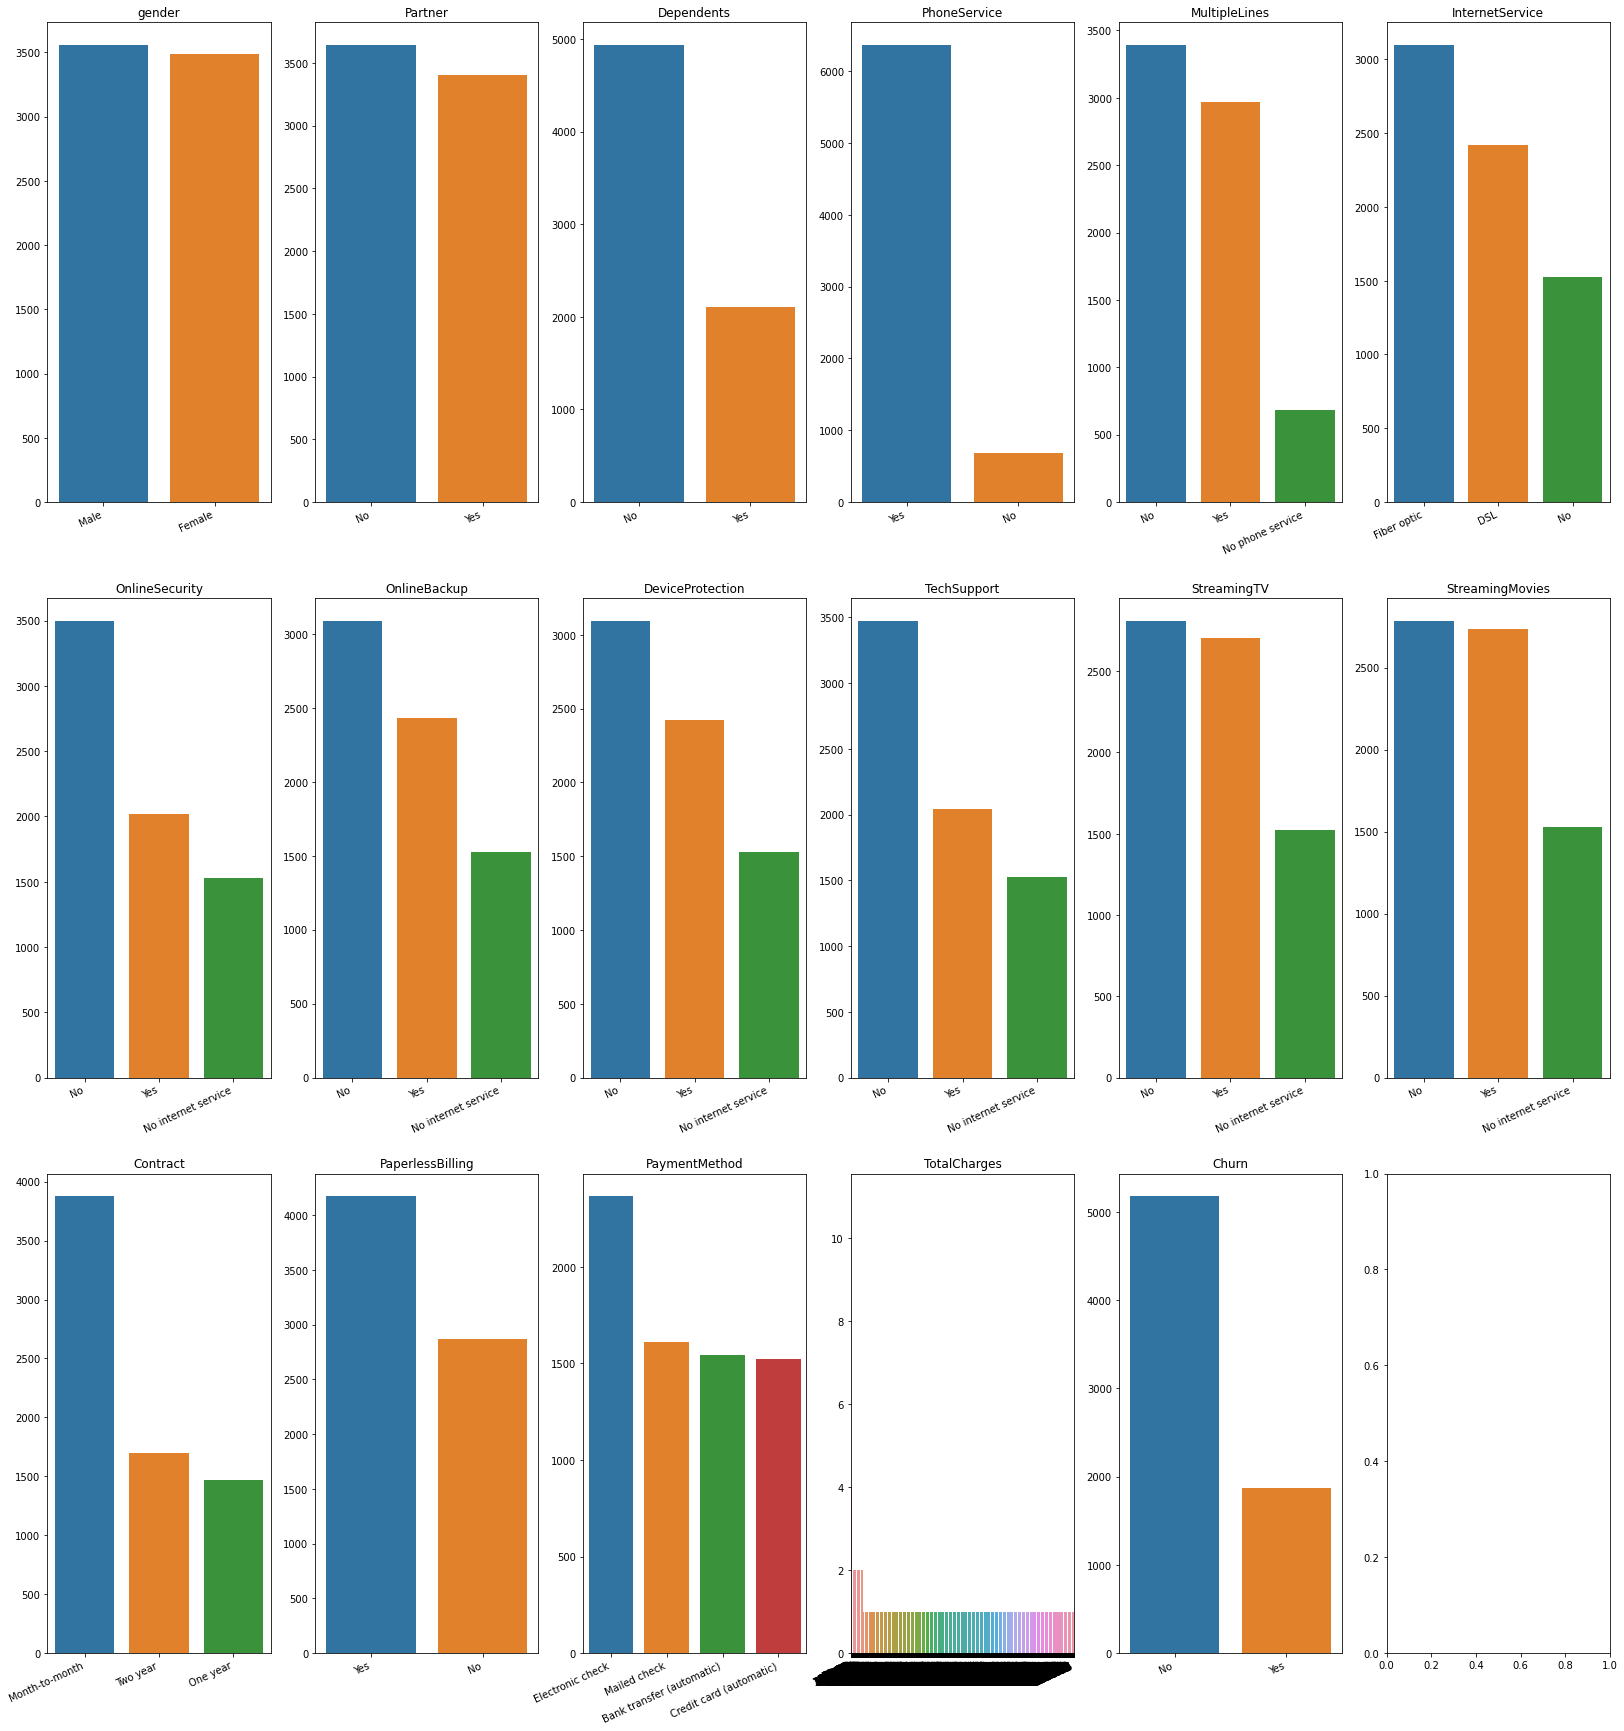

In [11]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data.columns):
    sns.barplot(x=cat_data[col].value_counts().index, y=cat_data[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

In [12]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Kolom TotalCharges seharsunya merupakan data bertipe float

- Jumlah wanita da pria hampir sama.

- Jumlah customer yang tidak memiliki pasangan lebih banyak sedikit daripada customer yang memiliki pasangan.

- Jumlah customer yang tidak memiliki tanggungan (dependents) dua kali lebih banyak dibandingkan customer yang memiliki tanggungan.

- Jumlah customer yang memiliki layanan telepon jauh lebih banyak dari yang tidak, kemungkinan ini berkaitan dengan seseorang yang senior citizen atau tidak.

- Kebanyakan customer tidak punya nomor telepon lebih dari satu, tetapi banyak juga customer yang punya nomor telepon lebih dari 1, dan hanya sedikit yang tidak memiliki nomor telepon.

- Kebanyakan customer memiliki layanan internet fiber optic, dan banyak juga yang layanan internetnya DSL. Namun ada cukup banyak juga customer yang tidak memiliki layanan internet.

- Kebanyakan customer tidak memiliki online security, online backup, device protection, dan tech support, sebagian lainnya memiliki keempatnya. 

- Customer yang tidak memiliki layanan Streaming TV dan Streaming Movies hampir sama banyaknya dengan customer yang memiliki kedua layanan tersebut.

- Kebanyakan customer memiliki kontrak month-to-month dan sebagiannya lagi kontraknya dua tahun dan satu tahun.

- Kebanyakan customer memiliki alat pembayaran non-tunai dan sebagiannya tidak memiliki alat pembayaran non-tunai.

- Kebanyakan customer melakukan metode pembayaran dengan electronic check dan sebagian lagi melakukan metode pembayaran dengan Mailed Check, transfer bank, dan kartu kredit.
 

In [13]:
data_2 = data[data['Churn']=='Yes']
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [14]:
cat_data2 = data_2[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

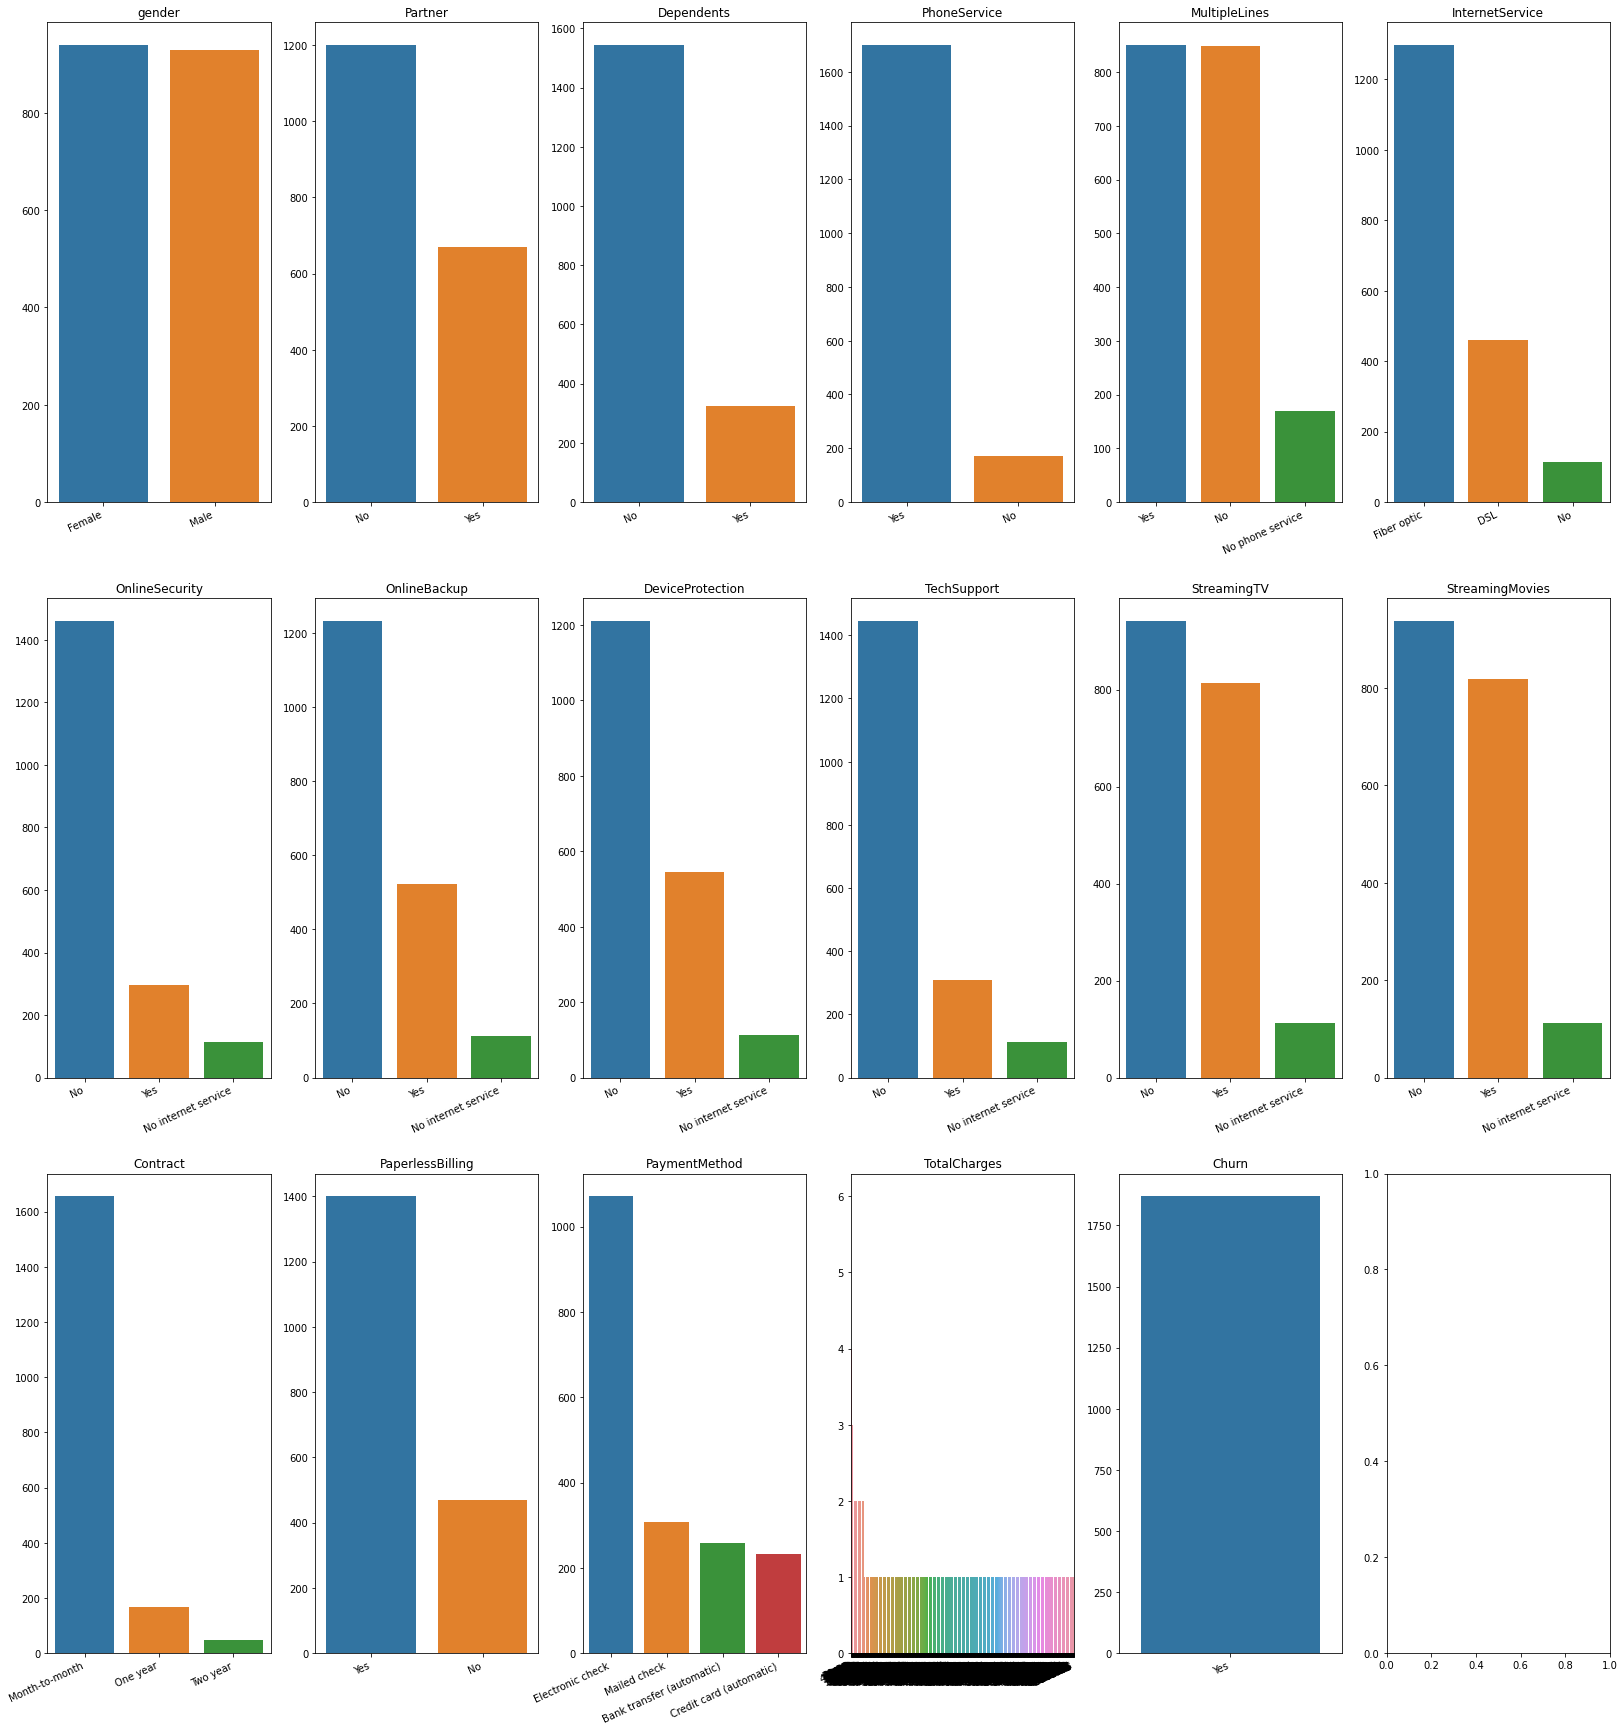

In [15]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data2.columns):
    sns.barplot(x=cat_data2[col].value_counts().index, y=cat_data2[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

- Terdapat perbedaan yang signifikan customer yang melakukan churn terdapat pada kolom Online Security dan Contract.

- Customer yang memiliki pasangan cenderung untuk tidak melakukan churn.

- Customer yang melakukan churn pada kolom multiple lines jumlahnya yang memiliki nomor lebih dari 1 dan yang tidak jumlahnya hampir sama, padahal sebelumnya keseluruhannya jumlah yang tidak memiliki nomor lebih dari 1 sedikit lebih banyak dibandingkan yang tidak. 

- Customer yang melakukan churn cenderung tidak memiliki Online Backup, Device Protection, dan Tech Support. 

- Customer yang melakukan churn juga cendering menyukai pembayaran non-tunai.

# Data Preprocessing

In [16]:
data['Churn'] = data['Churn'].map({'No':0,
                               'Yes': 1})

Kolom Target diganti menjadi 0 untuk No dan 1 untuk Yes

In [17]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

Kolom TotalCharges yang sebelumnya berbentuk object diubah menjadu bentuk numeriknya

In [18]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',
                               1: 'Yes'})

Kolom SeniorCitizen yang berbentuk 0 dan 1 diubah menjadi bentuk string agar keduanya setara.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
data['Churn'].unique()

array([0, 1])

### Data Inferenced

In [21]:
data_inf = data.sample(10, random_state=25)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4864,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [22]:
data = data.drop(data_inf.index)
data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [23]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split between X_train and X_test

In [24]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=25)

### Handling Outlier

In [26]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
         lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [27]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Normal']
Upper Boundary of tenure: 106.23011620441174
Lower Boundary of tenure: -41.280876623135825
Total Data Above Upper Boundary tenure: 0
Total Data Below Lower Boundary tenure: 0
% Data Above Upper Boundary tenure: 0.0
% Data Below Lower Boundary tenure: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of MonthlyCharges: 155.0405964372764
Lower Boundary of MonthlyCharges: -25.925012791217412
Total Data Above Upper Boundary MonthlyCharges: 0
Total Data Below Lower Boundary MonthlyCharges: 0
% Data Above Upper Boundary MonthlyCharges: 0.0
% Data Below Lower Boundary MonthlyCharges: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of TotalCharges: 8864.40625
Lower Boundary of TotalCharges: -4672.943749999999
Total Data Above Upper Boundary TotalCharges: 0
Total Data Below Lower Boundary TotalCharges: 0
% Data Above Upper

Tidak ada outlier pada kolom numerikalnya.

### Handling Missing Values

In [28]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [29]:
X_train['TotalCharges'].skew()

0.9714547187185171

In [30]:
print(X_train['TotalCharges'].median())

1389.475


In [31]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)

In [32]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Tidak ada Missing Value pada X_train

In [33]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [34]:
X_test['TotalCharges'].fillna(1389.475, inplace=True)

Missing Values pada X_test diisi dengan nilai median X_train

In [35]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Tidak ada Missing Value pada X_test

In [36]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [37]:
X_val['TotalCharges'].fillna(1389.475, inplace=True)

In [38]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Tidak ada Missing Values pada X_val

In [39]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada Missing Values pada data inference

### Feature Selection

In [40]:
X_train.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_val.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'] ,axis=1, inplace=True)

In [41]:
X_train.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
3769,Yes,Yes,52,Yes,DSL,No,Yes,Yes,No,One year,80.85,4079.55
6728,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.35,20.35
2004,No,Yes,49,Yes,Fiber optic,No,Yes,No,No,One year,100.45,4941.80
6026,Yes,Yes,66,Yes,Fiber optic,No,Yes,Yes,Yes,One year,110.85,7491.75
4899,No,Yes,72,Yes,Fiber optic,Yes,Yes,No,No,Two year,95.90,6954.15


Dari hasil EDA kolom-kolom tersebutlah yang dirasa tidak perlu dimasukkan ke dalam model.

### Numerical Columns and Categorical Columns

In [42]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']


In [43]:
def diagnostic_plots(data, column):
  skewness = data[column].skew(axis=0, skipna = True)
  print(f'Skewness of {column} =',skewness)

for column in num_columns:
     diagnostic_plots(X_train, column)

Skewness of tenure = 0.24310863528117743
Skewness of MonthlyCharges = -0.21441118803491116
Skewness of TotalCharges = 0.973908749559032


- Akan digunakan StandardScaler karena kebanyakan kolom memiliki distribusi normal
- Digunakan OneHotEncoder karena semua data kategorikal memiliki keduduan yang sama.

In [44]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [45]:
import sklearn
print(sklearn.__version__)

1.0.2


In [46]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [47]:
X_train.shape

(5063, 28)

In [48]:
X_val.shape

(563, 28)

In [49]:
X_test.shape

(1407, 28)

In [50]:
import pickle

In [51]:
with open("preprocessing.pkl", "wb") as f:
    pickle.dump(data_pipeline, f)

# Model Definition, training, dan Evaluation

## Sequential API 

In [52]:
# sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

# buat arsitekturnya

model_seq = Sequential()
model_seq.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq.add(Dropout(0.25))
model_seq.add(Dense(10, activation="relu"))# hidden layer 2
model_seq.add(Dropout(0.25))
model_seq.add(Dense(1, activation='sigmoid')) # Ouput layer

Digunakan model terbaik dari percobaan 15 model menggunakan Sequential API.

In [53]:
model_seq.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [54]:
history_seq = model_seq.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 2s 4ms/step - loss: 0.5168 - accuracy: 0.7401 - val_loss: 0.4238 - val_accuracy: 0.7940
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.7746 - val_loss: 0.4063 - val_accuracy: 0.8064
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7731 - val_loss: 0.4019 - val_accuracy: 0.8064
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.7788 - val_loss: 0.4013 - val_accuracy: 0.8064
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7808 - val_loss: 0.4025 - val_accuracy: 0.8028
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7853 - val_loss: 0.4015 - val_accuracy: 0.8011
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7810 - val_loss: 0.3997 - val_accuracy: 0.8011

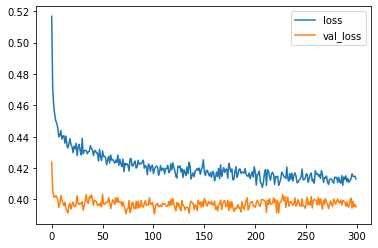

In [55]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq[['loss', 'val_loss']].plot();

Nilai loss antara train dan valnya saling mendekati dan terlihat mendekati good-fit.

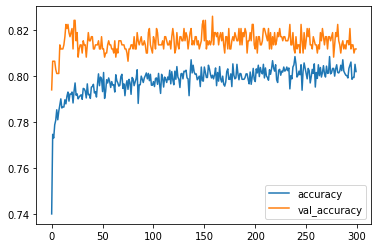

In [56]:
metrics_seq[['accuracy', 'val_accuracy']].plot();

Nilai akurasi antara train dan valnya saling mendekati dan terlihat mendekati good-fit.

In [57]:
y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq < 0.5, 0, 1).squeeze()

True Positive, True Negarive, False Positive, dan False Negative dari sudut pandang kelas satu:

- True Positive: Pelanggan yang memang churn atau akan meninggalkan produk/jasa perusahaan tersebut, model memprediksi pelanggan tersebut akan churn.

- True Negative: Pelanggan yang tidak churn atau tidak akan meninggalkan produk/jasa perusahaan tersebut, model memprediksi pelanggan tersebut tidak akan churn.

- False Positive: Pelanggan yang tidak churn atau tidak akan meninggalkan produk/jasa perusahaan tersebut, model memprediksi pelanggan tersebut akan churn.

- False Negative: Pelanggan yang akan churn atau akan meninggalkan produk/jasa perusahaan tersebut, model memprediksi pelanggan tersebut tidak akan churn.


Dari keempatnya yang paling berbahaya adalah False Positive karena dapat meninggalkan pelanggan setia, sehingga nilai precision lah yang lebih diperhitungkan.

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1028
           1       0.64      0.53      0.58       379

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Nilai Precision dari model terbaik Sequential API dari sudut pandang kelas 1 sebesar 64%.

### Functional API

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_drop_2)

model_func = Model(inputs=data_input, outputs=output)

In [60]:
model_func.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [61]:
history_func = model_func.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.6683 - accuracy: 0.5848 - val_loss: 0.4655 - val_accuracy: 0.7886
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5017 - accuracy: 0.7426 - val_loss: 0.4159 - val_accuracy: 0.7993
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4801 - accuracy: 0.7746 - val_loss: 0.4050 - val_accuracy: 0.8064
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4648 - accuracy: 0.7817 - val_loss: 0.4024 - val_accuracy: 0.8099
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4690 - accuracy: 0.7723 - val_loss: 0.4052 - val_accuracy: 0.8117
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7790 - val_loss: 0.3993 - val_accuracy: 0.8099
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.7845 - val_loss: 0.4004 - val_accuracy: 0.8117

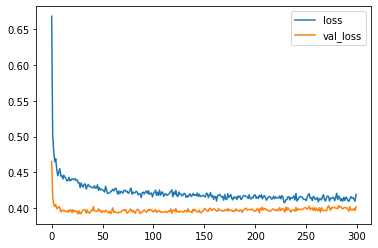

In [62]:
metrics_func = pd.DataFrame(history_func.history)
metrics_func[['loss', 'val_loss']].plot();

Nilai loss antara train dan valnya saling mendekati dan terlihat mendekati good-fit.

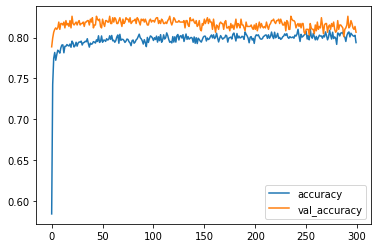

In [63]:
metrics_func[['accuracy', 'val_accuracy']].plot();

Nilai akurasi antara train dan valnya saling mendekati dan terlihat mendekati good-fit. 

In [64]:
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func < 0.5, 0, 1).squeeze()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1028
           1       0.67      0.45      0.54       379

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Nilai Precision dari model terbaik Sequential API dari sudut pandang kelas 1 sebesar 67%.

Nilai Precision menggunakan Functional API lebih tinggi yaitu sebesar 67% dibandingkan menggunakan Functional API yaitu 64%, maka dari itu digunakan Functional API untuk dilakukan Pipeline

### Pipeline

In [66]:
import tensorflow as tf
from tensorflow import keras

In [79]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(64)


#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)


#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)



#Call Model
data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_drop_2)

model_pipeline = Model(inputs=data_input, outputs=output)

#Compile
model_pipeline.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Fit
history_pipeline = model_pipeline.fit(train_dataset, epochs=300, validation_data=val_dataset)

Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 0.7173 - accuracy: 0.5524 - val_loss: 0.5509 - val_accuracy: 0.7407
Epoch 2/300
80/80 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7345 - val_loss: 0.4522 - val_accuracy: 0.7531
Epoch 3/300
80/80 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7515 - val_loss: 0.4228 - val_accuracy: 0.7869
Epoch 4/300
80/80 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7703 - val_loss: 0.4142 - val_accuracy: 0.7993
Epoch 5/300
80/80 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7725 - val_loss: 0.4096 - val_accuracy: 0.8064
Epoch 6/300
80/80 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.7711 - val_loss: 0.4078 - val_accuracy: 0.8099
Epoch 7/300
80/80 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7731 - val_loss: 0.4053 - val_accuracy: 0.8117
Epoch 8/300
8

In [80]:
model_pipeline.save('Model.h5')

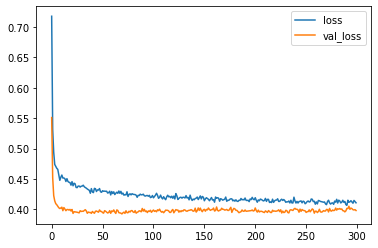

In [81]:
metrics_pipeline = pd.DataFrame(history_pipeline.history)
metrics_pipeline[['loss', 'val_loss']].plot();

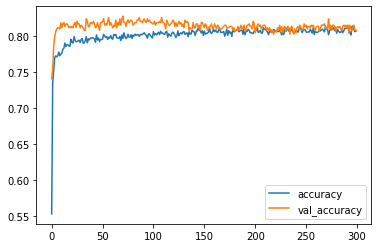

In [82]:
metrics_pipeline[['accuracy', 'val_accuracy']].plot();

In [83]:
y_pred_pipeline = model_pipeline.predict(test_dataset)
y_pred_pipeline = np.where(y_pred_pipeline < 0.5, 0, 1).squeeze()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1028
           1       0.65      0.46      0.54       379

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



# Model Inference

In [85]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [86]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
data_inf_1 = data_pipeline.transform(data_inf)

In [88]:
from tensorflow.keras.models import load_model
saved_model=load_model('Model.h5')
saved_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_9 (Dense)             (None, 20)                580       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable param

In [89]:
y_pred_inf = saved_model.predict(data_inf_1)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn-Prediction'])
y_pred_inf

,Churn-Prediction
0,0.239031
1,0.280979
2,0.314422
3,0.765974
4,0.189105
5,0.116309
6,0.006664
7,0.126245
8,0.382608
9,0.039439


In [90]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn-Prediction
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0,0.239031
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0,0.280979
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0,0.314422
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1,0.765974
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1,0.189105
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0,0.116309
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0,0.006664
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0,0.126245
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1,0.382608
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0,0.039439


# Pengambilan Keputusan

- Model ini bertujuan untuk mengetahui apakah customer akan meninggalkan produk atau jasa suatu perusahaan atau tidak.
- Dilakukan pemodelan dengan Artificial Neural Network menggunakan Tensorflow
- ANN dibuat menjadi 2 API, yaitu Sequential API dan Functional API
- Sequentianal API dibuat menjadi 15 model, dan model terbaik adalah model dengan hidden layer sebanyak 2, activation Relu dan sigmpid pada layer output, dropout 0.25 dan epoch 300 karena memiliki model yang good fit antara nilai loss dan nilai akurasi dari Train dan Val. Percobaan ini terdapat pada notebook Coba-coba sequential
- FUnctional API dibuat menjadi 10 model, dan model terbaik adalah model dengan hidden layer sebanyak 2, activation Relu dan sigmpid pada layer output, dropout 0.25 dan epoch 300 karena memiliki model yang good fit antara nilai loss dan nilai akurasi dari Train dan Val. Percobaan ini terdapat pada notebook Coba-coba Functional.
- Model terbaik dari kedua API digunakan untuk prediksi X_test dan model functional lah yang memiliki nilai precision sudut pandang kelas 1 atau kelas pelanggan yang melakukan churn yang lebih tinggi. Digunakan nilai precision pada sudut pandang kelas 1 karena False Positive lebih berbahaya dari False Negative.
- Dilakukan pipeline dengan shuffle 10000 dan batch sebanyak 64 dan didapatkan nilai presisi dari susut pandang 1 sebesar 65%.